### 11. Basic Fourier Transform 

In this exercise, you are going to implement and plot numerical Fourier transform, as well as numerical inverse Fourier transform. You may use modules like `numpy` to handle operations on complex numbers and arrays, but the Fourier transform and its inverse must both be coded from scratch.

1. Define a function $f(x)$. Create arrays with $n = \{10, 50, 100\}$ points $\in [-\pi; \pi]$ and visualize $f(x)$ for all three cases.

$$
f(x)= \sin(x) + 2\cos(2x) + 2\sin(3x).
$$




In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

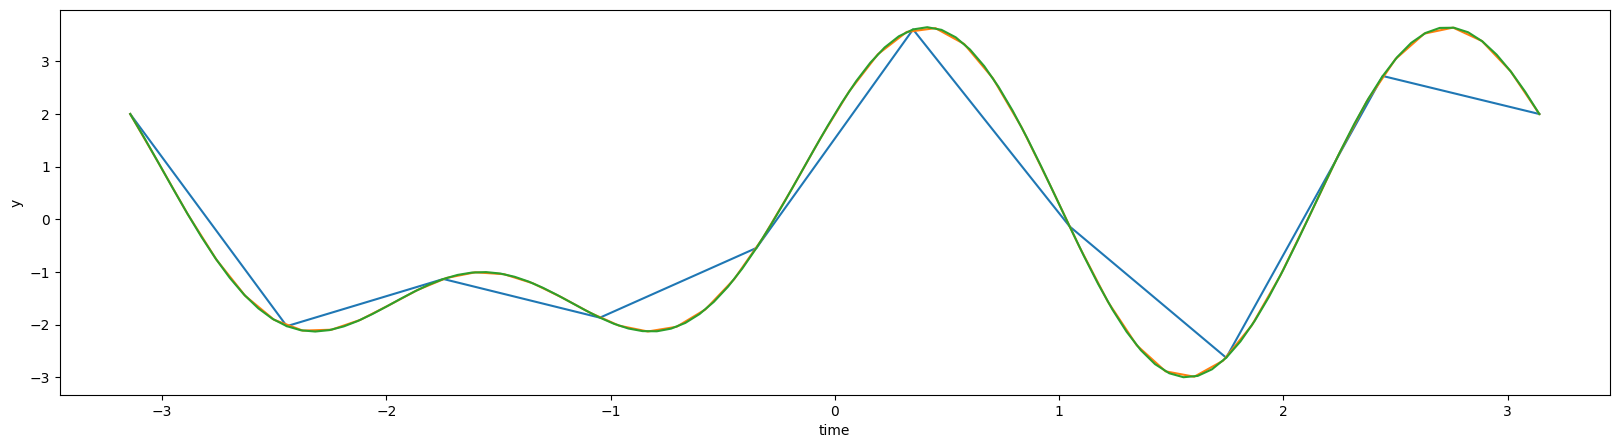

In [2]:
x1 = np.linspace(-np.pi,np.pi,10)
x2 = np.linspace(-np.pi,np.pi,50)
x3 = np.linspace(-np.pi,np.pi,100)

def f(x):
    return np.sin(x) + 2*np.cos(2*x) + 2*np.sin(3*x)

f1 = f(x1)
f2 = f(x2)
f3 = f(x3)

fig, ax = plt.subplots(1,figsize=(20,5))
ax.plot(x1, f1)
ax.plot(x2, f2)
ax.plot(x3, f3)
ax.set_xlabel("time")
ax.set_ylabel("y")

2. Define a function `FourierTrafo()` which takes in an $f$-array $\{f_0, f_1, ..., f_{N-1}\}$, and returns a Fourier-transformed array of values $f^{\ast} = \{f^{\ast}_0, f^{\ast}_1, ..., f^{\ast}_{N-1} \}$. The following equation must be satisfied:

$$
f^{\ast}_k = \sum_{l=0}^{N-1} f_l \cdot e^{-\frac{2\pi i}{N} \cdot k \cdot l} 
$$


In [3]:
def FourierTrafo(f_arr):
    ft_arr = np.empty(0)
    for k in range(len(f_arr)):
        freq = k/len(f_arr)
        fk = 0
        for l, fl in enumerate(f_arr):
            fk += fl*np.exp((-2*np.pi*1j)*freq*l)
        ft_arr = np.append(ft_arr, fk)
    return ft_arr


3. Define a function `InverseFourierTrafo()` which takes in an $f^{\ast}$-array $\{f^{\ast}_0, f^{\ast}_1, ..., f^{\ast}_{N-1}\}$, and returns an inverse-Fourier-transformed array of values $f = \{f_0, f_1, ..., f_{N-1} \}$. The following equation must be satisfied:

$$
f_k = \frac{1}{N}\sum_{l=0}^{N-1} f^{\ast}_l \cdot e^{\frac{2\pi i}{N} \cdot k \cdot l} 
$$


In [4]:
def InverseFourierTrafo(ftr_arr):
    f_arr = np.empty(0)
    for k in range(len(ftr_arr)):
        fk = 0
        for l, fl in enumerate(ftr_arr):
            fk += 1/len(ftr_arr)*fl*np.exp((2*np.pi*1j)/len(ftr_arr)*k*l)
        f_arr = np.append(f_arr, fk)
    return f_arr


4. Compute the Fourier transform $f^{\ast}$ for your function values. Then, for the resulting array $f^{\ast}$, compute the inverse Fourier transform $f^{\prime}$. Compute the Euclidean-2 norm $\| f - f^{\prime} \|$. 

In [5]:
ft1 = FourierTrafo(f1)
ft2 = FourierTrafo(f2)
ft3 = FourierTrafo(f3)
fit1 = InverseFourierTrafo(ft1)
fit2 = InverseFourierTrafo(ft2)
fit3 = InverseFourierTrafo(ft3)

n1 = np.linalg.norm(f1-fit1)
n2 = np.linalg.norm(f2-fit2)
n3 = np.linalg.norm(f3-fit3)
print(n1, n2, n3)

6.042848412095977e-15 3.675404836081081e-13 7.069406372481321e-13


5. Plot $f^{\prime}$ and $f^{\ast}$ into two subplots for all 3 values of $n$ (think carefully which values to use on your $x$-axis when plotting $f^{\ast}$), and label your graphs properly. 


c:\Users\sabse\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[Text(0, 0.5, 'amplitude'),
 Text(0, 0.5, 'amplitude'),
 Text(0, 0.5, 'amplitude')]

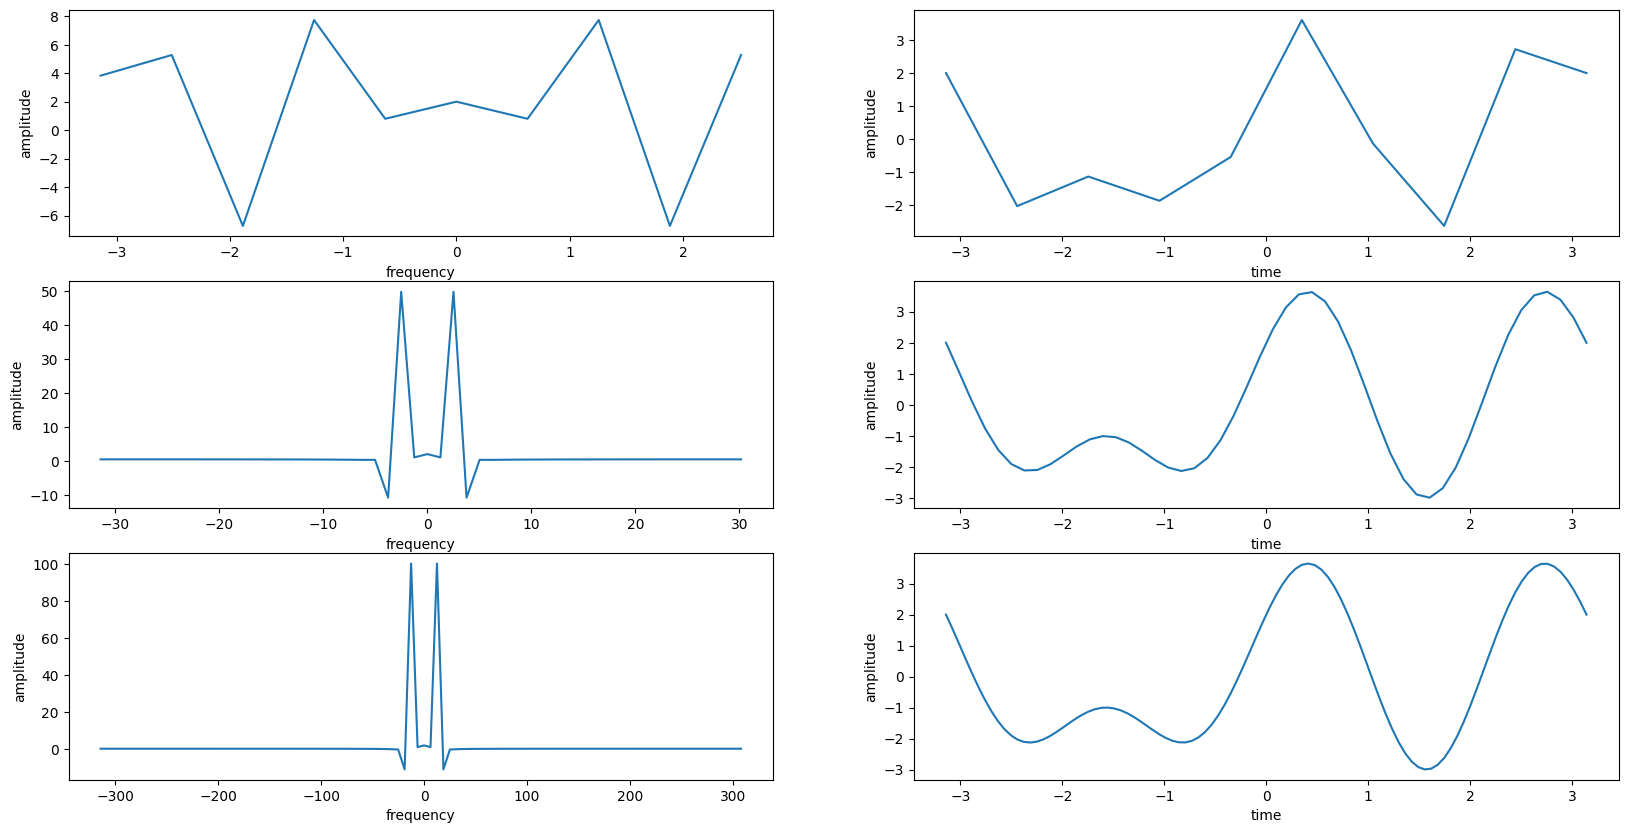

In [6]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
ax[0,1].plot(x1, fit1)
ax[0, 1].set_xlabel("time")
ax[1,1].plot(x2, fit2)
ax[1, 1].set_xlabel("time")
ax[2,1].plot(x3, fit3)
ax[2, 1].set_xlabel("time")

freq1 = np.append(np.arange(0, 0.5, 0.1), np.arange(-0.5, 0, 0.1))
freq2 = np.append(np.arange(0, 0.5, 0.02), np.arange(-0.5, 0, 0.02))
freq3 = np.append(np.arange(0, 0.5, 0.01), np.arange(-0.5, 0, 0.01))

arg1 = np.argsort(freq1)
arg2 = np.argsort(freq2)
arg3 = np.argsort(freq3)

ax[0, 0].plot(freq1[arg1]*2*np.pi, ft1[arg1])
ax[1, 0].plot(freq2[arg2]*2*np.pi*10, ft2[arg2])
ax[2, 0].plot(freq3[arg3]*2*np.pi*100, ft3[arg3])
[ax[i, 0].set_xlabel("frequency") for i in range(3)]
[ax[i, 0].set_ylabel("amplitude") for i in range(3)]
[ax[i, 1].set_ylabel("amplitude") for i in range(3)]


6. Explain the results and give an interpretation. Hint: You can look at the documentation for `numpy.fft.fftfreq` by calling `help(numpy.fft.fftfreq)`, if you are unsure about which x-axis values to use for the Fourier-transformed function values. To be clear: Do not use the `numpy.fft` for this task, but you can look at its individual function documentations to find out more about what you want to do.

The frequencies found in f are 1, 2 and 3, as seen in the original formula for f, but they aren't really demonstrated well by the visualization of the fft for the following reasons.

Somehow I can only convince myself that under this transform, all a higher N did, was increase the range of the frequencies analysed, not their precision.

As to why, I have no clue, after more than an hour of thinking about it.

The peaks must remain at the same frequencies, therefore the x-axis is rescaled apropriately by a factor N.

The inverseTransform works out perfectly too, so there can't be anything wrong with the functions, unless I reversed the error in the ift function...

I have included the proper visualization using np.fft below, where peaks at 1, 2 and 3 are perfectly well distinguishable.

Text(0, 0.5, 'amplitude')

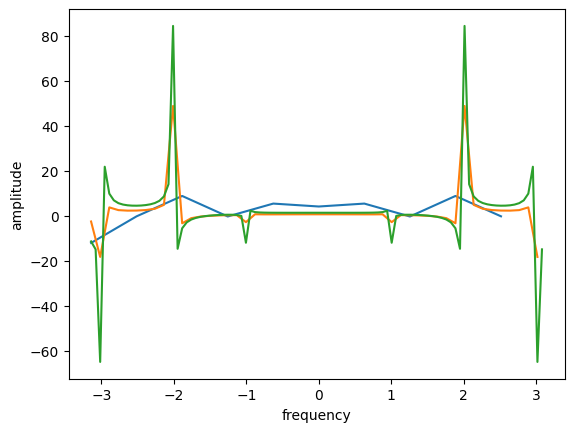

In [7]:
fig, ax = plt.subplots(1,1)
for x in [10, 50, 100]:
    t = np.arange(x)
    sp = np.fft.fft(np.sin(t) + 2*np.cos(2*t) + 2*np.sin(3*t))
    freq = np.fft.fftfreq(t.size)
    arg = np.argsort(freq)
    ax.plot(freq[arg]*2*np.pi, sp.real[arg])
ax.set_xlabel("frequency")
ax.set_ylabel("amplitude")

Ok. I've reconsidered and understood. I will leave everything above as is tho.
Below you'll find a way I would've expected this task to be given. Can't deny that dealing with this myself taught me more tho.

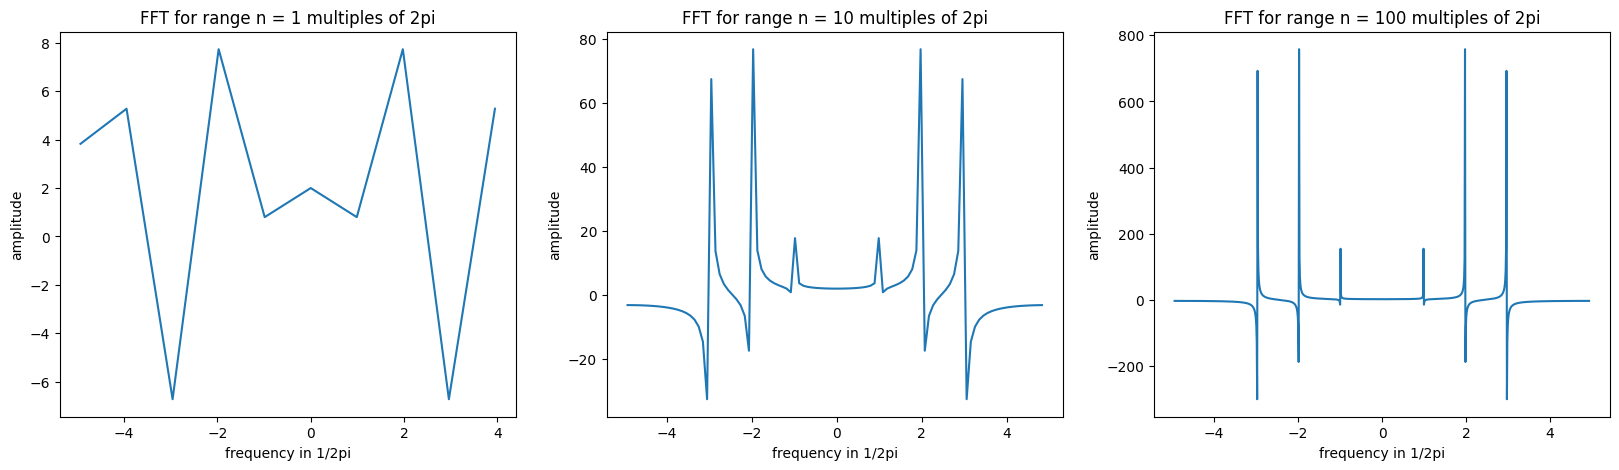

In [8]:
n = [1, 10, 100]
x = [np.linspace(-i*np.pi, i*np.pi, i*10) for i in n]
y = [f(x[i]) for i in range(3)]

fft = [FourierTrafo(y[i]) for i in range(3)]
freq = [np.append(np.arange(0, 0.5, 1/(10*i)), np.arange(-0.5, 0, 1/(10*i))) for i in n]

fig, ax = plt.subplots(1, 3, figsize=(20,5))
for i in range(3):
    arg = np.argsort(freq[i])
    ax[i].plot((freq[i])[arg]*np.pi**2, (fft[i])[arg])
    ax[i].set_xlabel("frequency in 1/2pi")
    ax[i].set_ylabel("amplitude")
    ax[i].set_title(("FFT for range n = "+ str(n[i]) + " multiples of 2pi"))


The definition of the FFT increases with the range in which a signal is given. If the definition of the signal is increased, the range of the FFT increases.

This sort of anti-symetric behaviour is found in many aspects of the FFT.

### 12. Filtering noise.

In this exercise, you are going to "clean" some rather noisy data and extract the underlying function.

1. Read the data from `ex14_data.csv`, which can be found on Moodle, store it in an array and visualize the data.

In [9]:
import pandas as pd

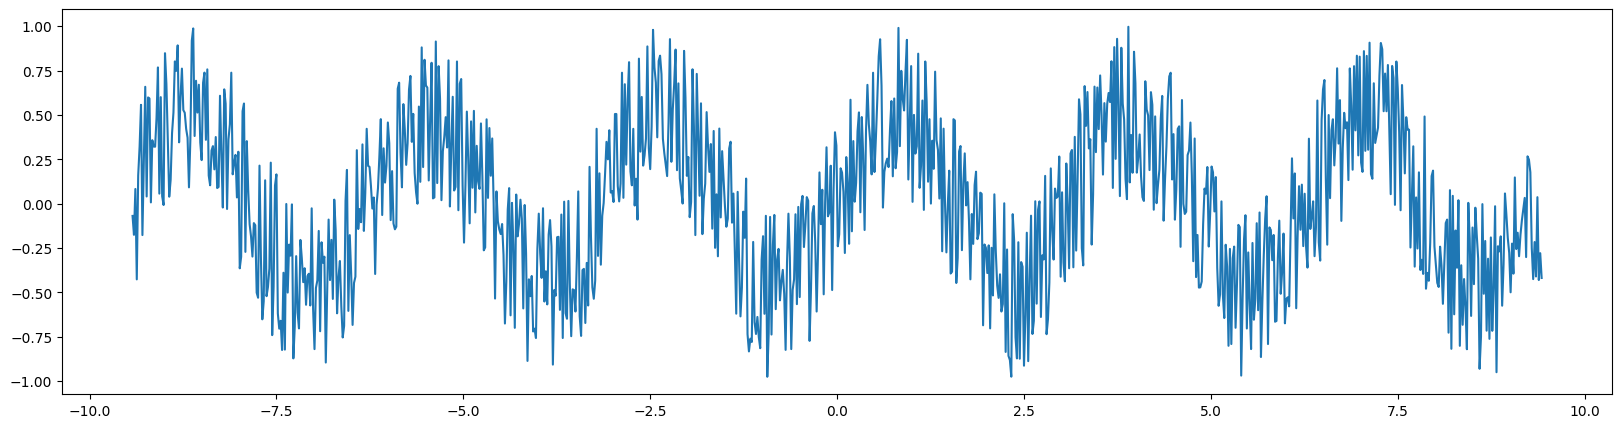

In [10]:
df = pd.read_csv("ex12_data.csv")
arr = df.to_numpy()

fig, ax = plt.subplots(1, figsize=(20,5))
ax.plot(arr[:,0], arr[:,1])

2. Check if your $x$-data is equidistant, and then use `numpy.fft` to calculate the Fourier transform $f^{\ast}$. Plot $f^{\ast}$ with the aid of `numpy.fft.fftfreq`.

Text(0, 0.5, 'amplitudes')

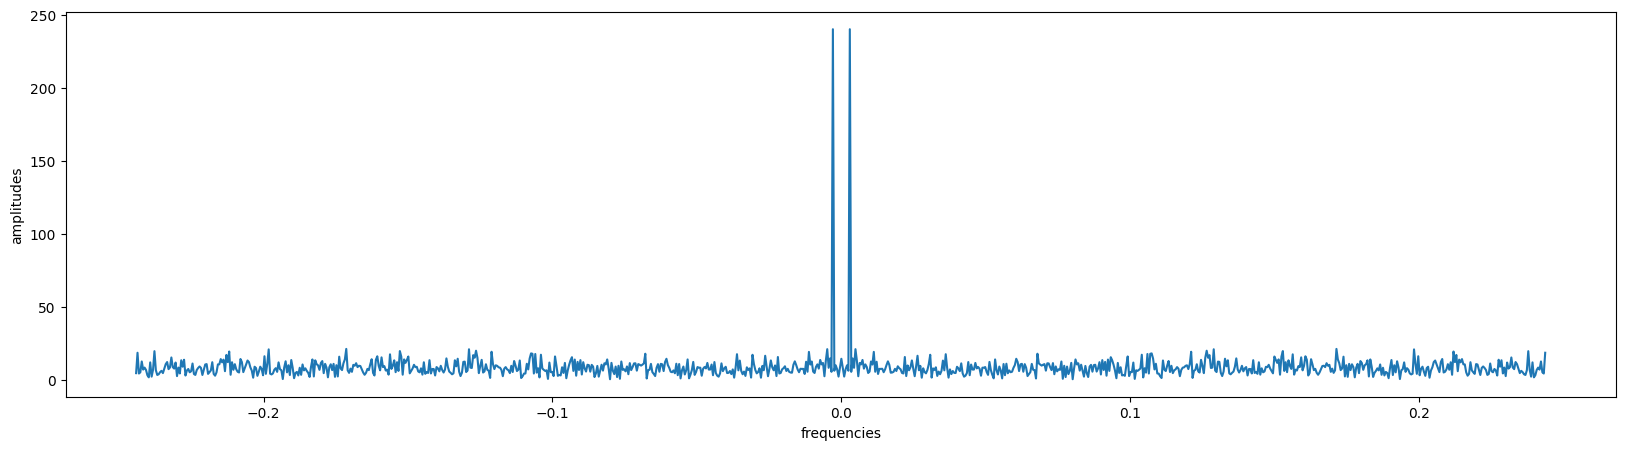

In [11]:
N = len(arr[:,1])
Tw = abs(arr[0, 1]) + abs(arr[-1, 1])
Fs = N/Tw
delF = Fs/N

fft = abs(np.fft.fft(arr[:,1],N))
freq = np.fft.fftfreq(N,delF)

arg = np.argsort(freq)

fig, ax = plt.subplots(1, figsize=(20,5))
ax.plot(freq[arg], fft[arg])
ax.set_xlabel("frequencies")
ax.set_ylabel("amplitudes")



3. Have a look at the plot of $f^{\ast}$ and define a threshold $\epsilon$ such that you set any values where $\textrm{abs}(x^{\ast}) > \epsilon$ to $0$. Compute the inverse Fourier transform of your modified data (use `numpy.fft.ifft`, for example). Generate another plot showing the noisy data and the filtered data and their corresponding Fourier transforms for different values of $\epsilon$.

##### VIA amplitude of FFT:

c:\Users\sabse\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


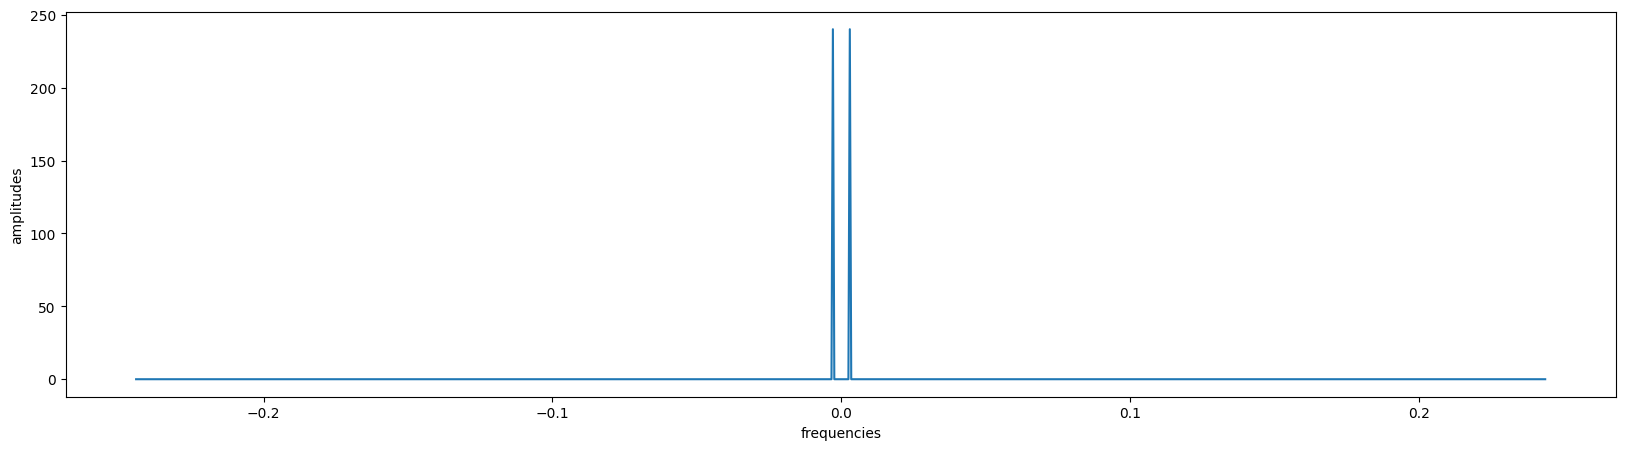

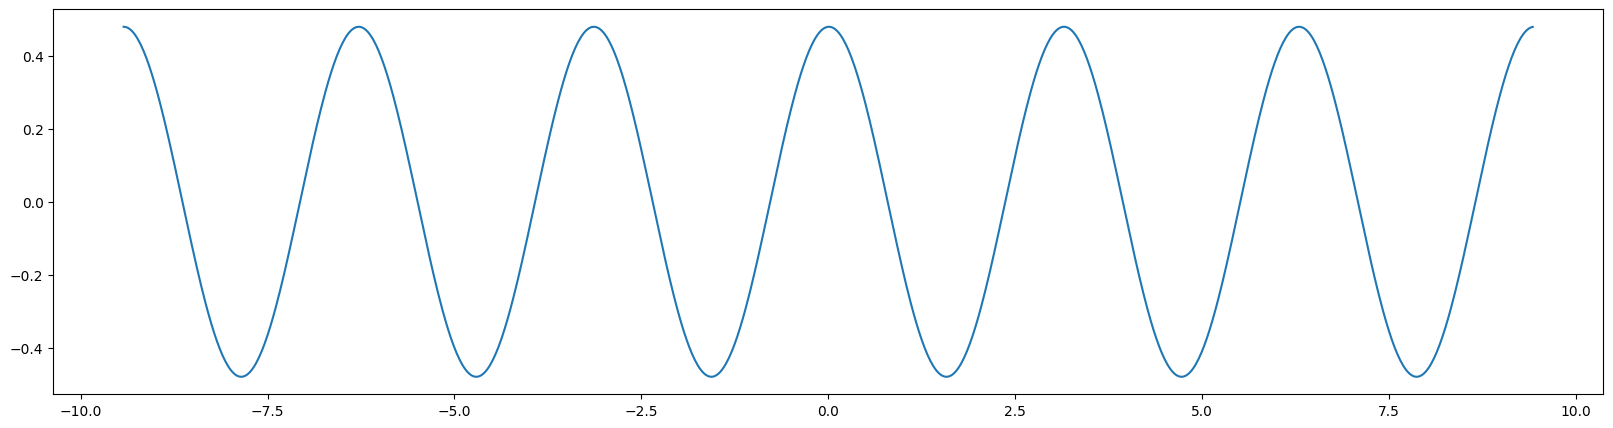

In [12]:
idx = fft > 100
fft_clean2 = fft * idx

fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(freq[arg], fft_clean2[arg])
ax.set_xlabel("frequencies")
ax.set_ylabel("amplitudes")

ifft = np.fft.ifft(fft_clean2)

fig, ax = plt.subplots(1, figsize=(20, 5))
ax.plot(arr[:, 0], ifft)


##### VIA PowerSpectrum:

Text(0, 0.5, 'amplitudes of iFFT')

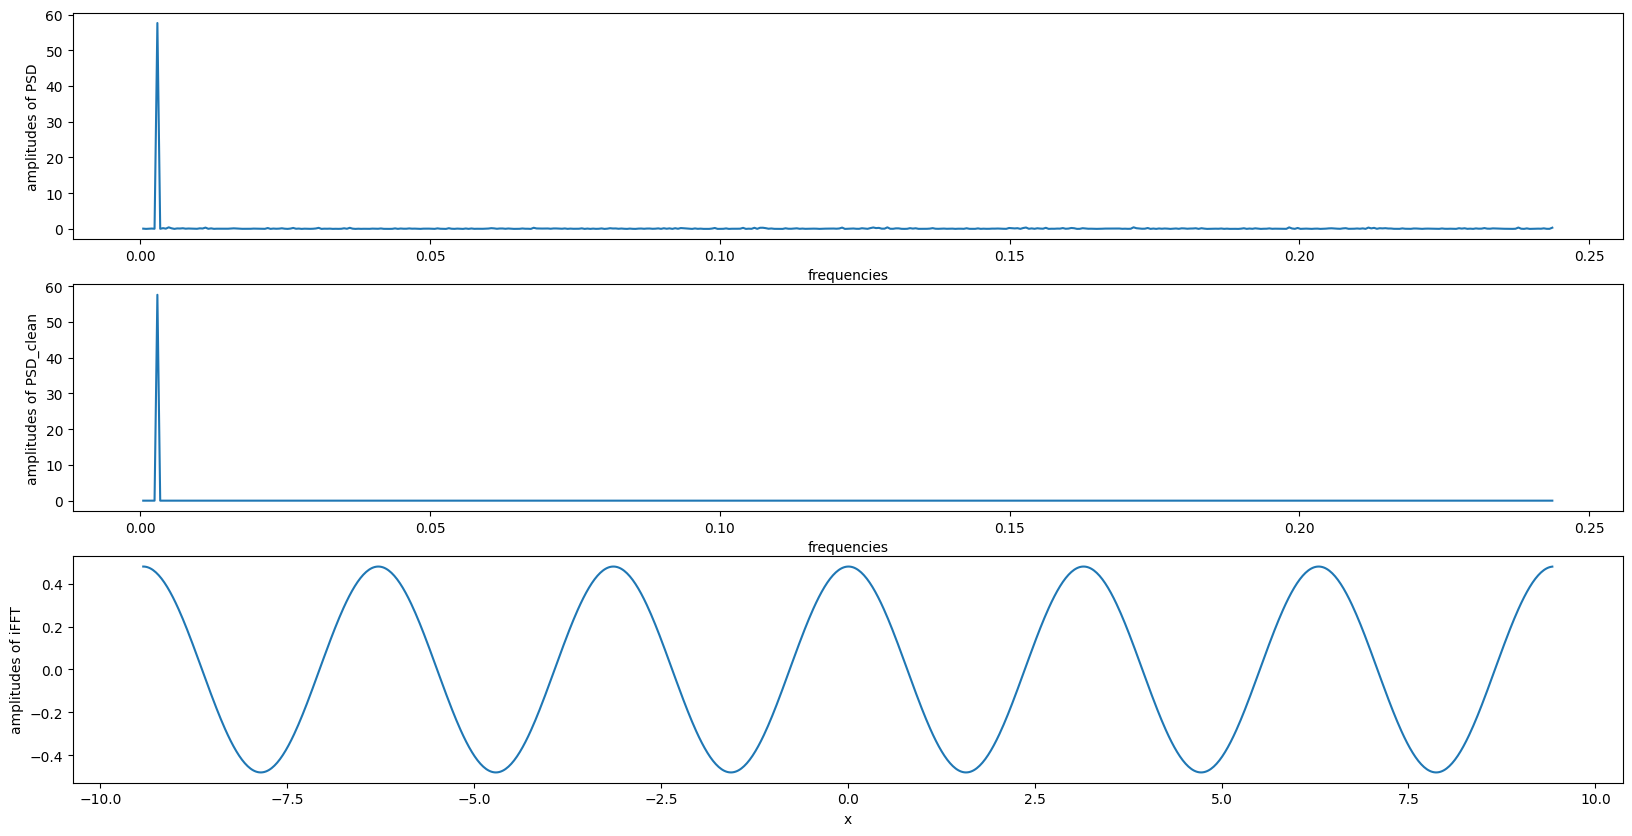

In [13]:
PSD = fft*np.conj(fft)/N
freq = 1/(delF*N) * np.arange(N)
L = np.arange(1, np.floor(N/2), dtype=int)

idx = PSD > 50
PSD_clean = PSD * idx
fft_clean = fft * idx
ifft = np.fft.ifft(fft_clean)

fig, ax = plt.subplots(3, figsize=(20, 10))
ax[0].plot(freq[L], PSD[L])
ax[0].set_xlabel("frequencies")
ax[0].set_ylabel("amplitudes of PSD")
ax[1].plot(freq[L], PSD_clean[L])
ax[1].set_xlabel("frequencies")
ax[1].set_ylabel("amplitudes of PSD_clean")
ax[2].plot(arr[:,0], ifft)
ax[2].set_xlabel("x")
ax[2].set_ylabel("amplitudes of iFFT")


4. What is a good choice for $\epsilon$?

Choosing a method where you pick such an epsilon is stupid from the start. Filtering out high frequencies, ok, but you won't get anywhere with that in this example?

$\textbf{Note:}$ When comparing the run time of your own Fourier Transform to the one in this exercise, you might notice a significant speed increase. Here, we have been using Fast Fourier Transform (FFT), which indeed significantly outperforms the hard-coded Fourier Transform we have employed in the prior exercise.